In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.random.seed(123)

In [2]:
def make_data():
    N = 20   # sample size
    X = np.random.random(N) * 10
    β = 3
    ϵ = np.random.normal(loc=0, scale=1, size=N)
    y = β * X + ϵ
    return pd.DataFrame([X, y], index=['x', 'y']).T

In [3]:
data = make_data()

<AxesSubplot:xlabel='x', ylabel='y'>

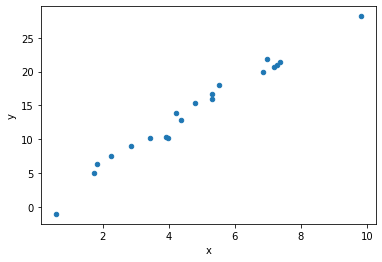

In [4]:
data.plot.scatter('x', 'y')

# Coefficient of determination (aka. $R^2$)

In [5]:
results = smf.ols('y ~ x', data=data).fit()

In [6]:
y_hat = results.predict(data.x)

In [7]:
var_y = np.var(data.y)
var_y_hat = np.var(y_hat)

In [8]:
r_squared = var_y_hat / var_y
ρ_squared = np.corrcoef(data.y, y_hat)[0][1] ** 2

In [9]:
print(f'{var_y=:.2f}, {var_y_hat=:.2f}, {r_squared=:.4f}, {ρ_squared=:.4f}')

var_y=47.42, var_y_hat=46.22, r_squared=0.9747, ρ_squared=0.9747


In [10]:
# make sure the calculation of `r_squared` is reasonable.
# note in real implementation, degree of freedoms may matter when sample size is small
assert np.isclose(r_squared, results.rsquared)

# Show $\rho^2 = R^2$

In [11]:
assert np.isclose(r_squared, ρ_squared)

# More stats of the fit

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     693.1
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           8.00e-16
Time:                        20:57:08   Log-Likelihood:                -30.204
No. Observations:                  20   AIC:                             64.41
Df Residuals:                      18   BIC:                             66.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1367      0.602     -0.227      0.8